In [2]:
!pip install node2vec

In [16]:
import networkx as nx
from node2vec import Node2Vec

EMBEDDING_FILENAME="em_filename.txt"
EMBEDDING_MODEL_FILENAME="em_model"
EDGES_EMBEDDING_FILENAME="edg_em_file"

# Create a graph 
graph = nx.fast_gnp_random_graph(n=10, p=0.5)

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar('2')  # Output node names are always strings

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

# Embed edges using Hadamard method
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

# Look for embeddings on the fly - here we pass normal tuples
edges_embs[('1', '2')]
''' OUTPUT
array([ 5.75068220e-03, -1.10937878e-02,  3.76693785e-01,  2.69105062e-02,
       ... ... ....
       ..................................................................],
      dtype=float32)
'''

# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv = edges_embs.as_keyed_vectors()

# Look for most similar edges - this time tuples must be sorted and as str
edges_kv.most_similar(str(('1', '2')))

# Save embeddings for later use
edges_kv.save_word2vec_format(EDGES_EMBEDDING_FILENAME)

Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating edge features: 100%|██████████| 55/55.0 [00:00<00:00, 76234.87it/s]


In [4]:
import sys
print(sys.version)

3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


In [26]:
!cat em_filename.txt

10 64
6 0.13519302 0.173521 0.029005814 -0.023979565 -0.20168 -0.21850626 -0.2689895 -0.06535586 0.046527226 0.030629117 -0.14722024 -0.029022569 -0.0190183 0.114255704 -0.048158728 0.14137779 0.06998801 0.14676324 -0.15092967 -0.05717801 0.1394542 -0.044524528 0.0733862 -0.015757833 -0.07019338 -0.14064313 -0.1745138 0.08985774 -0.21745072 -0.13477668 -0.13556834 0.051943954 0.041612692 0.01512446 0.18206209 -0.053894613 0.017814254 -0.004996525 0.17438169 0.01057957 -0.15247402 0.12587628 -0.02103544 -0.049870446 0.06742153 0.026606629 -0.22035573 0.1332075 -0.040401667 -0.009094984 -0.18931995 0.14429265 -0.091537975 0.036923274 -0.1720203 -0.11566151 0.19240977 0.022741033 0.014380492 0.060350817 -0.28686902 0.098903 0.071352 -0.2242696
7 0.13830313 0.14449559 0.038842425 -0.063858874 -0.17255275 -0.19456077 -0.26340428 -0.11562993 0.051650736 0.06996629 -0.099287875 0.087339826 0.010424073 0.15368839 -0.11902208 0.098812126 -0.021506142 0.08653206 -0.10530631 -0.010935962 0.067185

Algorytm t-SNE

*   algorytm nalezący do klasy manifold learning 
*   algorytm oblicza nową reprezentację danych uczących, ale nie zezwala na przekształcenie nowych danych (nie można zastosować do zbioru uczącego)
*   Ideą jest znalezienie dwuwymiarowej reprezentacji danych, która najlepiej zachowuje odległości pomiędzy punktami 
*   Rozpoczyna się od losowej dwuwymiarowej reprezentacji dla każdego punktu danych, a następnie próbuje zbliżyć punkty, które są blisko pierwotnej przestrzenii cech, a punkty położone daleko od siebie w pierwotnej przestrzenii cech są daleko od siebie




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ConversionWarning: Some errors were detected !
    Line #1 (got 2 columns instead of 64)
  


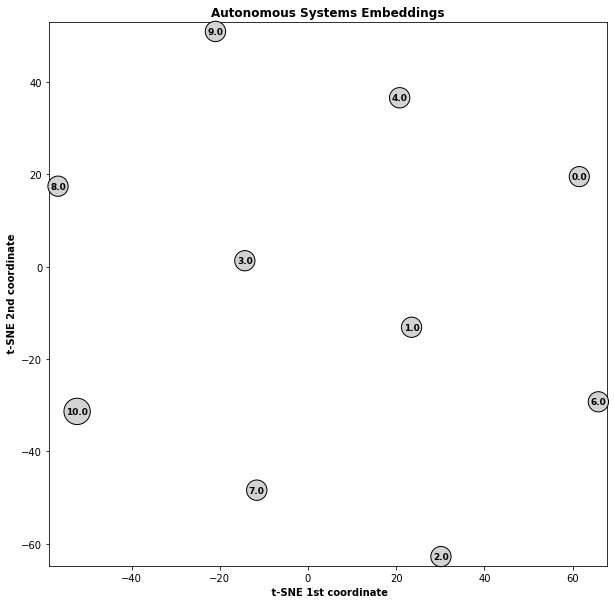

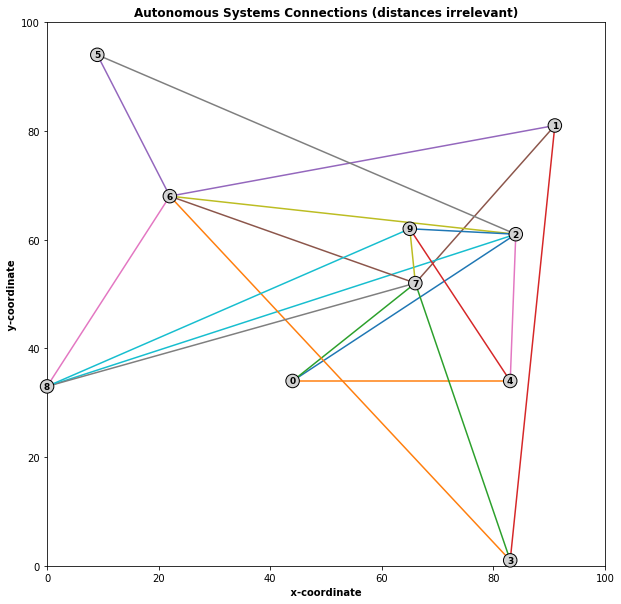

In [31]:
#@title t-SNE
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random 

# extracting data without id's
File_data = np.genfromtxt("em_filename.txt", dtype=float,invalid_raise = False,usecols=np.arange(1, 65))

# extracting id's from source file
as_labels = np.genfromtxt("em_filename.txt", dtype=float,invalid_raise = False,usecols=np.arange(0, 1))

# making embeddings 
embedding = TSNE(n_components=2,learning_rate='auto',init='random').fit_transform(File_data)

# plot limiting
plt.figure(figsize=(10,10))
plt.xlim(embedding[:,0].min()-2,embedding[:,0].max() + 2)
plt.ylim(embedding[:,1].min()-2,embedding[:,1].max() + 2)

# assigning numbers to points in plot 
for i in range(len(embedding)):
  plt.text(embedding[i,0],embedding[i,1],str(as_labels[i]),fontdict={'weight': 'bold', 'size': 9},ha="center", va="center",bbox = dict(boxstyle=f"circle,pad={0.25}", fc="lightgrey"))

# plotting
plt.xlabel(' t-SNE 1st coordinate',fontweight="bold")
plt.ylabel(' t-SNE 2nd coordinate', fontweight="bold")
plt.title('Autonomous Systems Embeddings',fontweight="bold")
plt.show()

# Connections plotting
plt.figure(figsize=(10,10))
plt.xlim(0,100)
plt.ylim(0,100)

node_list = {}

# randomizing AS locations in map
for i in graph.nodes:
  x_random = random.randint(0,100)
  y_random = random.randint(0,100)
  node_list[i]= ([x_random,y_random])  
  plt.text(x_random,y_random,str(i),fontdict={'weight': 'bold', 'size': 9},ha="center", va="center",bbox = dict(boxstyle=f"circle,pad={0.25}", fc="lightgrey"))

# Looking for edges
for j in graph.edges:
  plt.plot([node_list[j[0]][0],node_list[j[1]][0]],[node_list[j[0]][1],node_list[j[1]][1]])

plt.title('Autonomous Systems Connections (distances irrelevant - randomized)',fontweight="bold")

print()
print()

plt.xlabel(' x-coordinate ',fontweight="bold")
plt.ylabel(' y-coordinate ', fontweight="bold")
plt.show()